<a href="https://colab.research.google.com/github/ddarshana04/Machine-Learning/blob/main/Linear-Regression/Real_estate_price_prediction_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [2]:
import zipfile
zf = zipfile.ZipFile('stock_market_data.csv.zip')
zf.namelist()  

['AAPL.csv']

In [3]:
Stock=pd.read_csv(zf.open('AAPL.csv'),index_col = 0)

In [4]:
df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


In [5]:
df_Stock.tail(5)

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,452.82,454.70,441.17,444.45,49453300,27.954399,455.316298,343.498702,454.79,439.46,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,450.91
2020-08-10,450.40,455.10,440.00,450.91,53100900,29.847338,462.586675,343.197325,444.45,454.79,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,437.50
2020-08-11,447.88,449.93,436.43,437.50,46975600,30.576290,466.543079,344.237921,450.91,444.45,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,452.04
2020-08-12,441.99,453.10,441.19,452.04,41486200,32.050532,472.583564,344.381436,437.50,450.91,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,460.04
2020-08-13,457.72,464.17,455.71,460.04,52520500,33.532634,479.279768,345.149232,452.04,437.50,...,270.255,265.4540,255.0446,3373.43,3380.35,3349.16,27896.72,27976.84,27386.98,459.63


In [6]:
df_Stock.shape

(3732, 63)

In [7]:
df_Stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

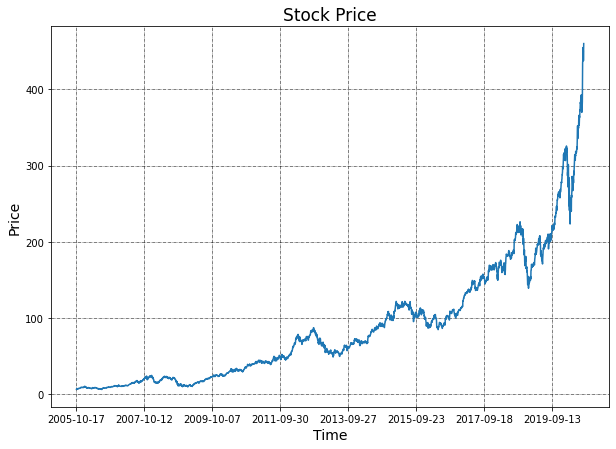

In [8]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [9]:
df_Stock = df_Stock.drop(columns='Date_col')

In [10]:
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))
    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [11]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  3732
Training Set length -  3284
Validation Set length -  373
Test Set length -  74
(3284, 61) (373, 61) (75, 61)
(3284,) (373,) (75,)


In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [13]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 8.63718430e-03  1.86051919e-01  1.55487056e-01  1.12263756e+00
  1.27287036e-10  6.75244700e-03  1.40229153e-01  1.13219365e-01
  4.25627945e-02  8.96348485e-02  1.01914954e-01  5.94183534e-02
  7.95194230e-02  7.10399924e-02  2.71425005e-01  1.26724259e-01
  8.79333149e-02 -5.87980410e-03 -3.31643390e-01 -3.31643390e-01
 -3.31643390e-01 -3.31643390e-01 -3.31643390e-01  1.88650007e+00
 -1.27270720e+00 -1.65042225e-01 -4.36658408e-04 -3.17442253e-12
 -5.07434351e-03  9.02936542e-03  5.78317055e-04  5.78317058e-04
 -5.57918038e-01 -2.02304618e-10  4.18932389e-11  1.69322438e-02
  1.61636704e-02 -1.75659582e-02  6.12165520e-03  2.15420350e-01
  1.13979655e-01 -2.41954674e-01  7.63050309e-02  3.73276597e-01
 -1.16573418e-15 -5.60843989e-02  4.08788806e-02  5.13473863e-01
 -2.94431540e-02 -8.41335080e-02  5.10939135e-02 -8.14435716e-03
 -1.95035195e-02  5.67587251e-02  4.39707788e-02  1.29311738e-02
 -9.99967544e-03 -3.89778364e-03 -1.62174814e-03  1.44436900e-03
  2.83

In [14]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9994516474373267


In [15]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
#PREDICTION TEST DATASET
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [17]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))

Training R-squared:  1.0


In [18]:
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))

Training Explained Variation:  1.0


In [19]:
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 

Training MAPE: 1.45


In [20]:
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 

Training Mean Squared Error: 1.48


In [21]:
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))

Training RMSE:  1.22


In [22]:
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

Training MAE:  0.76


In [23]:
print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))

Validation R-squared:  0.99


In [24]:
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))

Validation Explained Variation:  0.99


In [25]:
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 

Validation MAPE: 1.68


In [26]:
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 

Validation Mean Squared Error: 1.48


In [27]:
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))

Validation RMSE:  5.91


In [28]:
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

Validation MAE:  3.75


In [29]:
print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))

Test R-squared:  0.96


In [30]:
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))

Test Explained Variation:  0.97


In [31]:
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))

Test MAPE: 1.77


In [32]:
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 

Test Mean Squared Error: 79.21


In [33]:
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))

Test RMSE:  8.9


In [34]:
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Test MAE:  6.5


In [35]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2018-11-01,202.30,216.289778
1,2018-11-02,196.56,201.470182
2,2018-11-05,198.68,195.948933
3,2018-11-06,204.71,199.043601
4,2018-11-07,204.00,204.193666
...,...,...,...
368,2020-04-22,273.79,275.751755
369,2020-04-23,281.70,274.020243
370,2020-04-24,281.90,280.710045
371,2020-04-27,277.33,280.543603


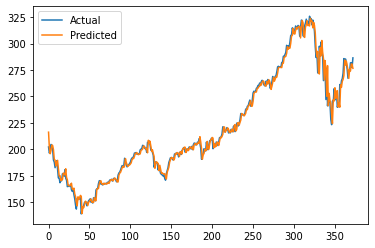

In [36]:
df_pred[['Actual', 'Predicted']].plot()

In [37]:
print("Intercept: ",lr.intercept_)
print("Coefficent: ",lr.coef_)

Intercept:  -83.3648640964228
Coefficent:  [ 8.63718430e-03  1.86051919e-01  1.55487056e-01  1.12263756e+00
  1.27287036e-10  6.75244700e-03  1.40229153e-01  1.13219365e-01
  4.25627945e-02  8.96348485e-02  1.01914954e-01  5.94183534e-02
  7.95194230e-02  7.10399924e-02  2.71425005e-01  1.26724259e-01
  8.79333149e-02 -5.87980410e-03 -3.31643390e-01 -3.31643390e-01
 -3.31643390e-01 -3.31643390e-01 -3.31643390e-01  1.88650007e+00
 -1.27270720e+00 -1.65042225e-01 -4.36658408e-04 -3.17442253e-12
 -5.07434351e-03  9.02936542e-03  5.78317055e-04  5.78317058e-04
 -5.57918038e-01 -2.02304618e-10  4.18932389e-11  1.69322438e-02
  1.61636704e-02 -1.75659582e-02  6.12165520e-03  2.15420350e-01
  1.13979655e-01 -2.41954674e-01  7.63050309e-02  3.73276597e-01
 -1.16573418e-15 -5.60843989e-02  4.08788806e-02  5.13473863e-01
 -2.94431540e-02 -8.41335080e-02  5.10939135e-02 -8.14435716e-03
 -1.95035195e-02  5.67587251e-02  4.39707788e-02  1.29311738e-02
 -9.99967544e-03 -3.89778364e-03 -1.62174814e-0